In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import struct

from codecs import decode


def bin_to_float(b):
    bf = int(b, 2).to_bytes(8)
    return struct.unpack('>d', bf)[0]

def run(n, length=100):
    if length == 0:
        return [f(n)] 
    return [n] + run(f(n), length=length-1)

def f(x):
    return 3.815 * x * (1 - x)

In [2]:
n1 = 0.25
b = f"{struct.unpack('>Q', struct.pack('>d', n1))[0]:064b}"
n2 = bin_to_float(b[:-1] + '1')
n3 = bin_to_float(b[:-2] + '10')

In [3]:
n1

0.25

In [4]:
n2

0.25000000000000006

In [5]:
n3

0.2500000000000001

In [6]:
n3 - n2

5.551115123125783e-17

In [7]:
n2 - n1

5.551115123125783e-17

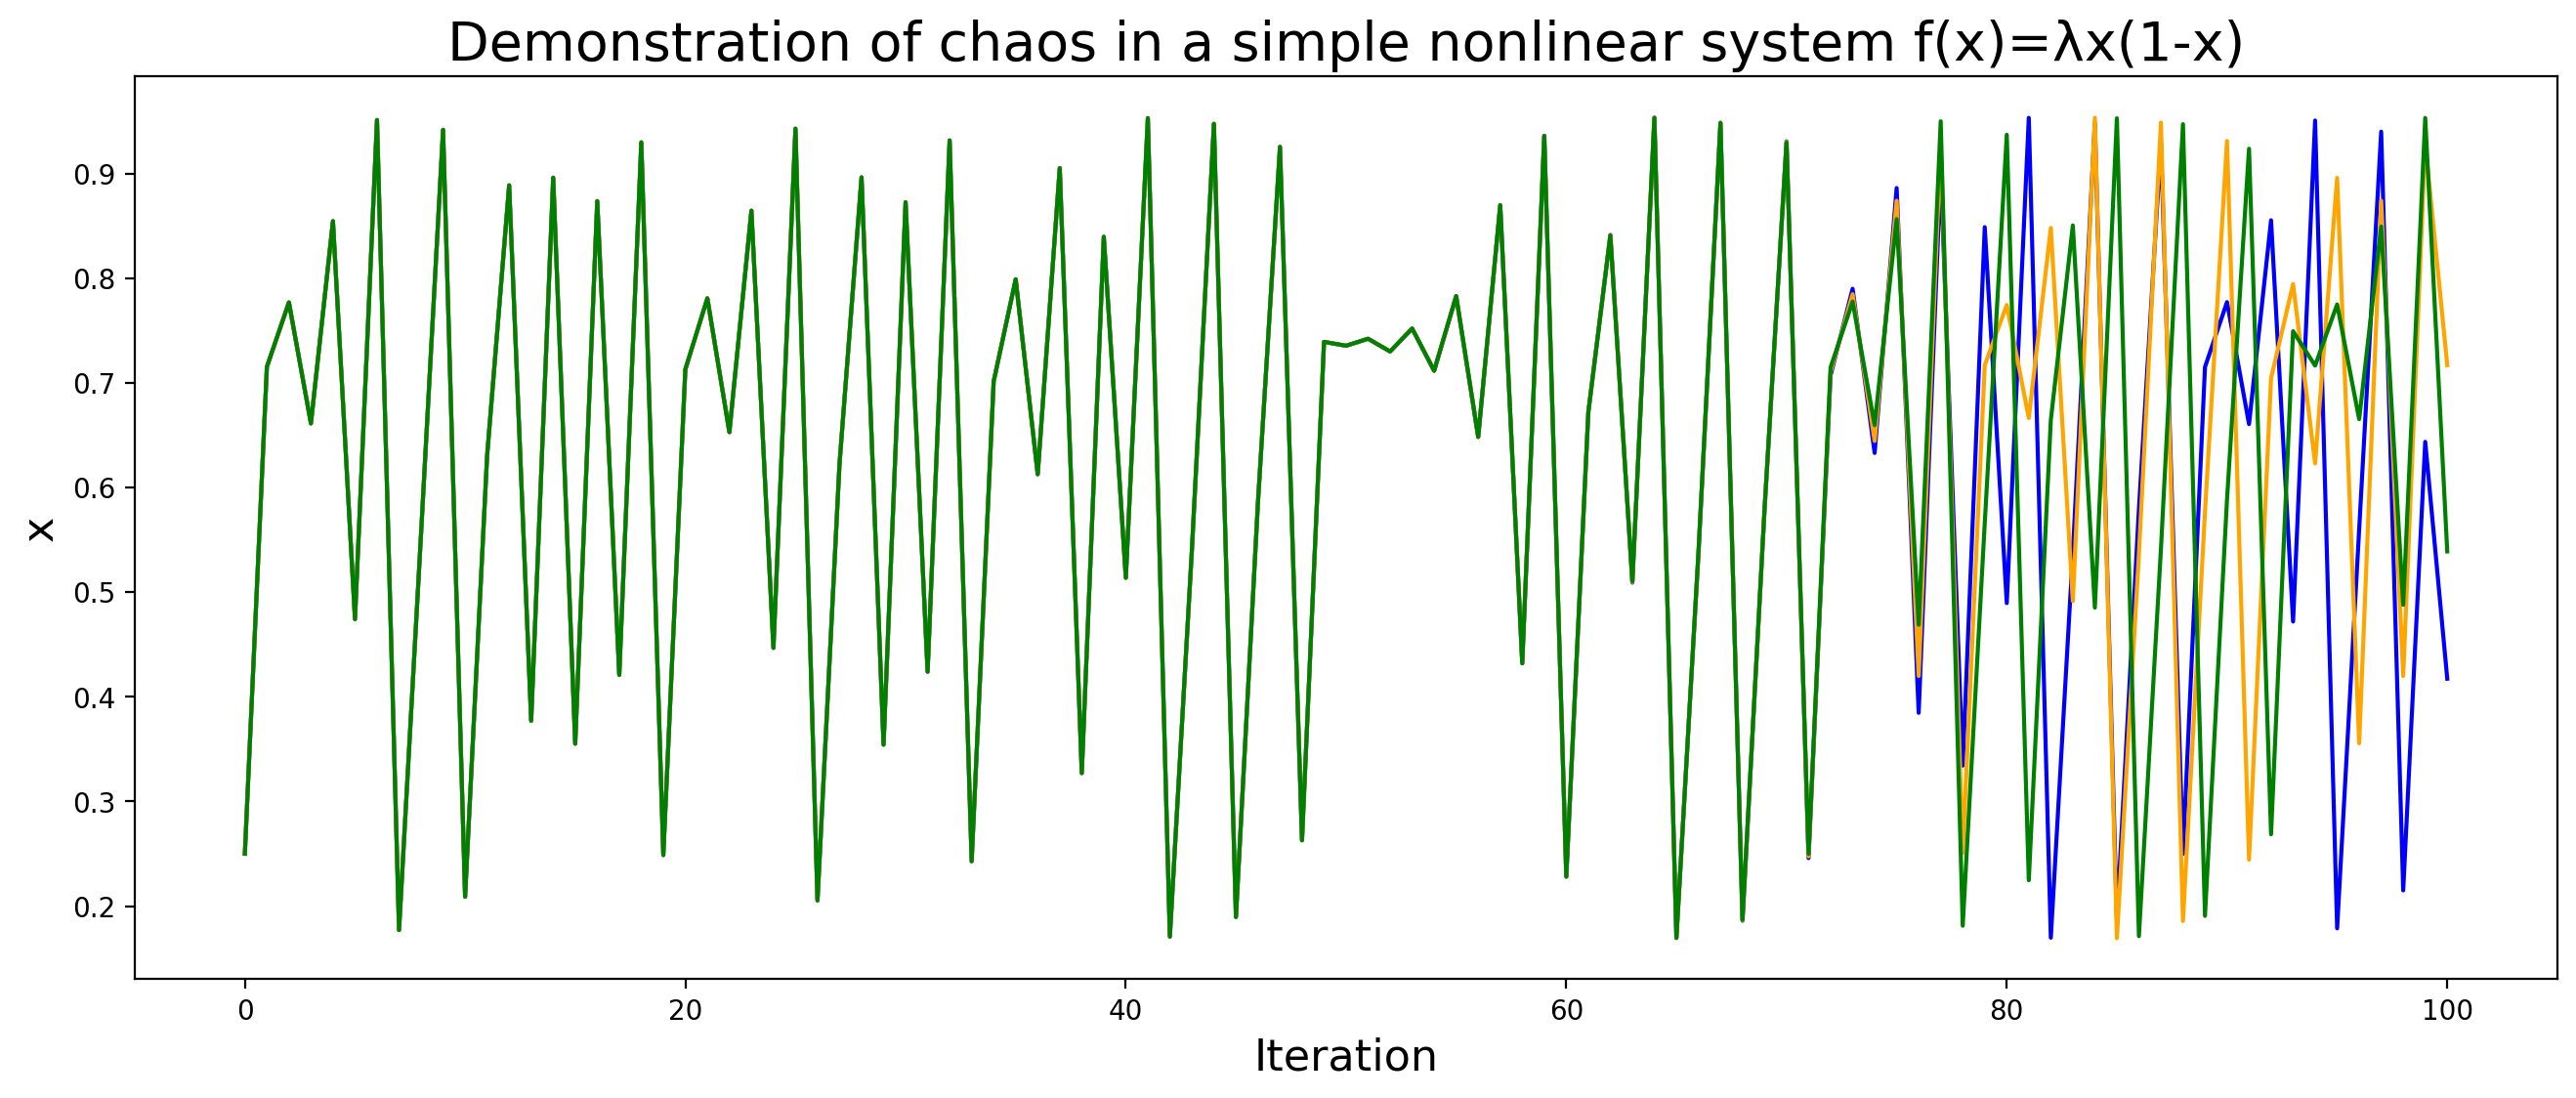

In [8]:
plt.figure(figsize=(16, 6), dpi=200)
for n, c in zip([n1, n2, n3], ['b', 'orange', 'g']):
    plt.plot(run(n), c=c)
plt.xlabel("Iteration", fontsize=16)
plt.ylabel("x", fontsize=16)
plt.title("Demonstration of chaos in a simple nonlinear system f(x)=λx(1-x)", fontsize=20)
plt.savefig("images/chaos.png")
plt.show()

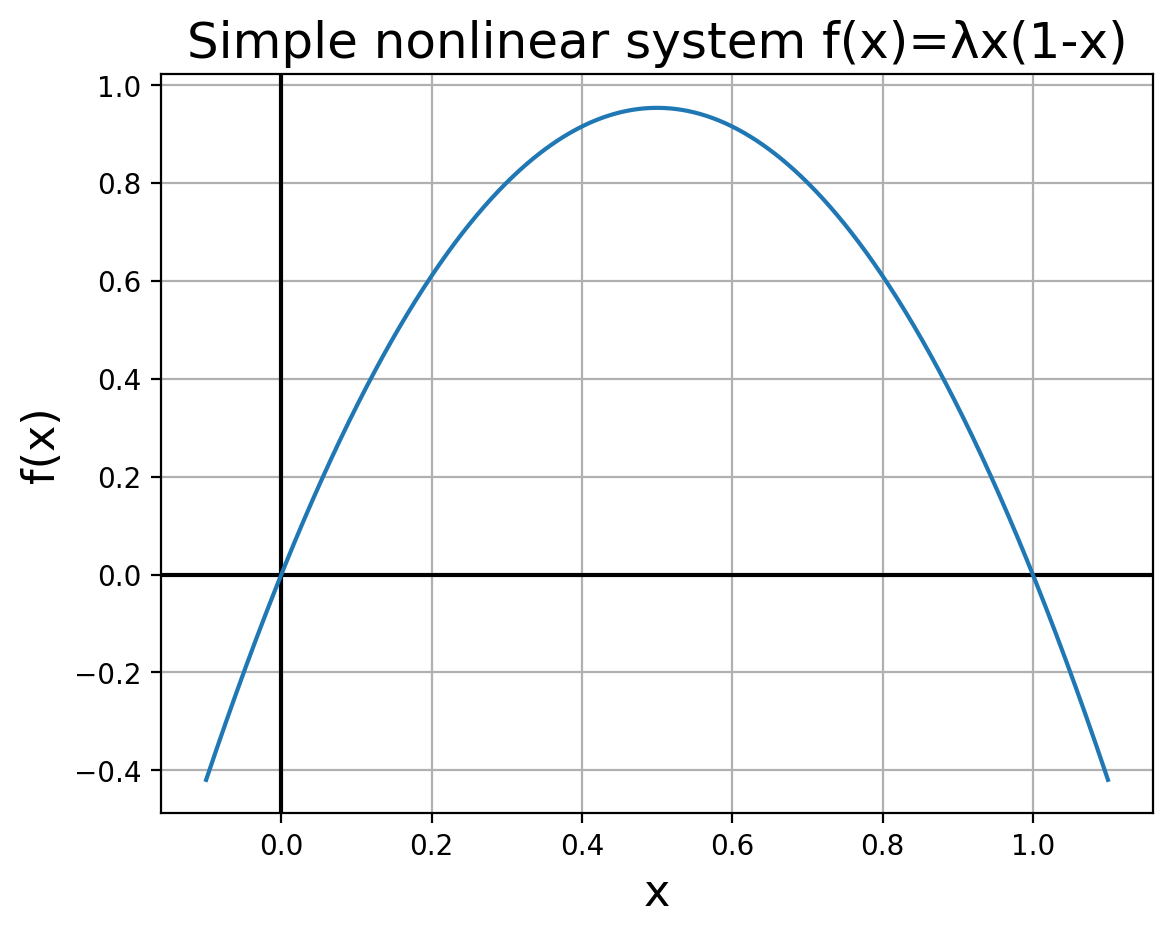

In [9]:
x = np.linspace(-0.1, 1.1, 1000)
plt.figure(dpi=200)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x, np.vectorize(f)(x))
plt.grid()
plt.xlabel("x", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.title("Simple nonlinear system f(x)=λx(1-x)", fontsize=18)
plt.savefig("images/parabola.png")
plt.show()